In [24]:
import importlib
import tabulate
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt




In [25]:
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

from mysklearn.myutils import detect_and_remove_outliers



In [26]:
table = MyPyTable()
df = table.load_from_file("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.pretty_print()

customerID    gender      SeniorCitizen  Partner    Dependents      tenure  PhoneService    MultipleLines     InternetService    OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling    PaymentMethod                MonthlyCharges  TotalCharges    Churn
------------  --------  ---------------  ---------  ------------  --------  --------------  ----------------  -----------------  -------------------  -------------------  -------------------  -------------------  -------------------  -------------------  --------------  ------------------  -------------------------  ----------------  --------------  -------
7590-VHVEG    Female                  0  Yes        No                   1  No              No phone service  DSL                No                   Yes                  No                   No                   No                   No                   Month-to-month  Yes        

# Data Cleaning

### Overview of the Dataframe

In [27]:
# Display the number of rows and columns
print("Number of rows and columns :", df.get_shape())


# Display data types of each column
print("\nData types of each column:")
data_types = df.get_data_types()
for col_name, dtype in data_types.items():
    print(f"{col_name}: {dtype}")



Number of rows and columns : (7043, 21)

Data types of each column:
customerID: str
gender: str
SeniorCitizen: float
Partner: str
Dependents: str
tenure: float
PhoneService: str
MultipleLines: str
InternetService: str
OnlineSecurity: str
OnlineBackup: str
DeviceProtection: str
TechSupport: str
StreamingTV: str
StreamingMovies: str
Contract: str
PaperlessBilling: str
PaymentMethod: str
MonthlyCharges: float
TotalCharges: str
Churn: str


### Checking for Missing Values

In [28]:

try:
    df.convert_to_numeric()
    invalid_values_count = sum(1 for value in df.get_column("TotalCharges") if value == "NA")
    print("\nNumber of non-numeric TotalCharges values:", invalid_values_count)
except ValueError as e:
    print("\nError converting 'TotalCharges' to numeric:", e)

# Remove rows with missing 'TotalCharges' values
df.remove_rows_with_missing_values()
print("\nRemoved rows with missing TotalCharges values.")


Number of non-numeric TotalCharges values: 0

Removed rows with missing TotalCharges values.


### Converting  to numeric 

In [29]:
df = df.convert_column_to_type('TotalCharges', float)
data_types = df.get_data_types()
for col_name, dtype in data_types.items():
    print(f"{col_name}: {dtype}")


customerID: str
gender: str
SeniorCitizen: float
Partner: str
Dependents: str
tenure: float
PhoneService: str
MultipleLines: str
InternetService: str
OnlineSecurity: str
OnlineBackup: str
DeviceProtection: str
TechSupport: str
StreamingTV: str
StreamingMovies: str
Contract: str
PaperlessBilling: str
PaymentMethod: str
MonthlyCharges: float
TotalCharges: float
Churn: str


### Replacing str(NA) in numeric column with its mean 


In [30]:
df.replace_na_with_mean("TotalCharges")

### Normalization of Numerical Columns

In [31]:
# Normalize numerical columns
columns_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']
df.normalize_columns(columns_to_normalize)



### Removing duplicates 

In [32]:
key_columns = ['customerID', 'MonthlyCharges', 'TotalCharges']
duplicate_indexes = df.find_duplicates(key_columns)

print("Indexes of duplicate rows:", duplicate_indexes)

df.drop_rows(duplicate_indexes)

print("\nTable after removing duplicates:")
df.pretty_print()


Indexes of duplicate rows: []

Table after removing duplicates:
customerID    gender      SeniorCitizen  Partner    Dependents       tenure  PhoneService    MultipleLines     InternetService    OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling    PaymentMethod                MonthlyCharges    TotalCharges  Churn
------------  --------  ---------------  ---------  ------------  ---------  --------------  ----------------  -----------------  -------------------  -------------------  -------------------  -------------------  -------------------  -------------------  --------------  ------------------  -------------------------  ----------------  --------------  -------
7590-VHVEG    Female                  0  Yes        No            0.0138889  No              No phone service  DSL                No                   Yes                  No                   No                   No

## Exploratory Data Analysis (EDA)

### Visualizations for Numerical Columns

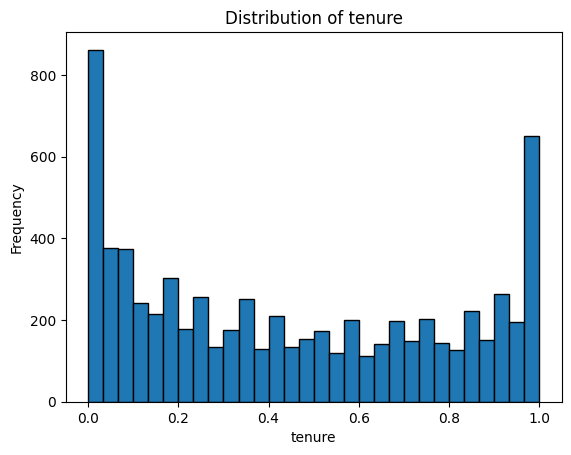

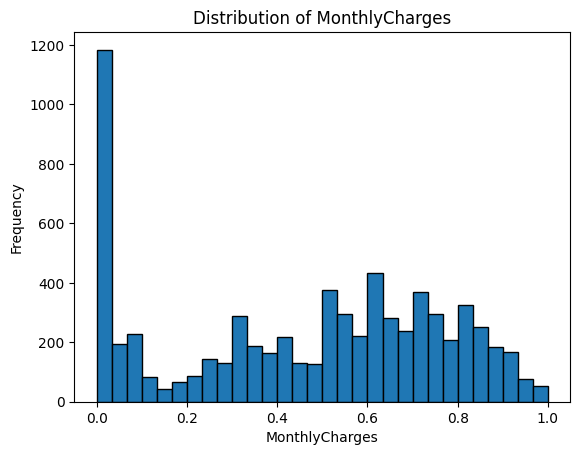

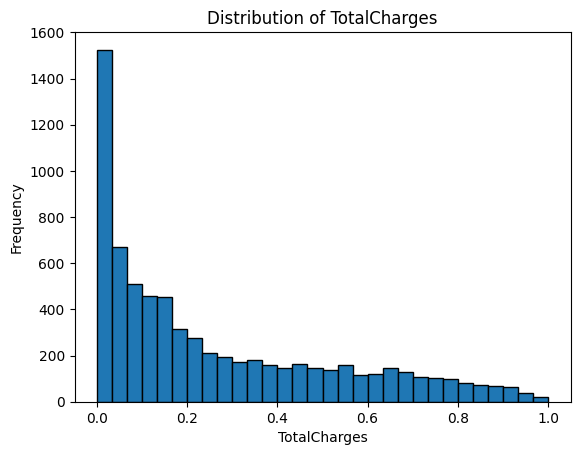

In [33]:
# Columns to visualize
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    plt.figure()

    # Use get_column to retrieve data for the column
    column_data = df.get_column(column, include_missing_values=False)

    # Plot histogram
    plt.hist(column_data, bins=30, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()


Analyze relationships between categorical variables (e.g., `Contract`, `Churn`, and `InternetService`).

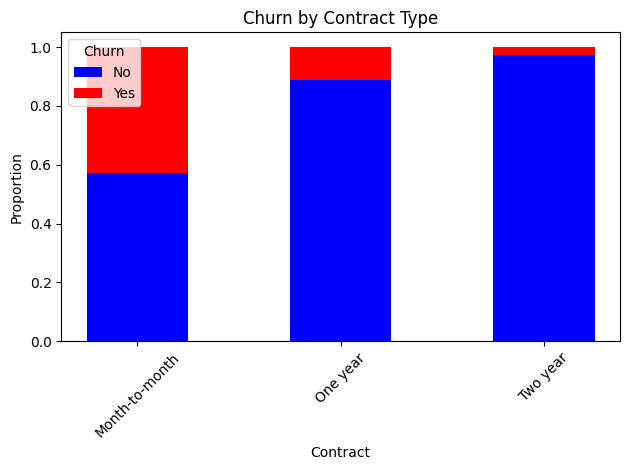

In [34]:
contract_col = table.get_column("Contract")
churn_col = table.get_column("Churn")

# Create a dictionary to count occurrences
contract_churn_counts = {}
for contract, churn in zip(contract_col, churn_col):
    if contract not in contract_churn_counts:
        contract_churn_counts[contract] = {"Yes": 0, "No": 0}
    contract_churn_counts[contract][churn] += 1

# Normalize the counts by contract type
contract_types = list(contract_churn_counts.keys())
yes_counts = [
    contract_churn_counts[contract]["Yes"] /
    (contract_churn_counts[contract]["Yes"] + contract_churn_counts[contract]["No"])
    for contract in contract_types
]
no_counts = [
    contract_churn_counts[contract]["No"] /
    (contract_churn_counts[contract]["Yes"] + contract_churn_counts[contract]["No"])
    for contract in contract_types
]

# Plot the stacked bar chart
bar_width = 0.5
x_positions = range(len(contract_types))

plt.bar(x_positions, no_counts, bar_width, label="No", color="blue")
plt.bar(x_positions, yes_counts, bar_width, bottom=no_counts, label="Yes", color="red")

plt.title("Churn by Contract Type")
plt.xlabel("Contract")
plt.ylabel("Proportion")
plt.xticks(ticks=x_positions, labels=contract_types, rotation=45)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


## Overview
The dataset contains 7032 rows and 21 columns, with information about customers, their services, and churn behavior.

### Key Features:
- **Categorical**: `gender`, `SeniorCitizen`, `Contract`, `InternetService`, etc.
- **Numerical**: `tenure`, `MonthlyCharges`, `TotalCharges`.

---

## Preprocessing
1. **Missing Values**: Removed 0 rows 
2. **Normalization**: Scaled `tenure`, `MonthlyCharges`, and `TotalCharges` using Min-Max Scaling.
3. **Outliers**: No significant outliers detected after IQR analysis.

---

## Insights
1. **Contract Type**:
   - Customers with "Month-to-Month" contracts have the highest churn rate.
   - Long-term contracts (`One year`, `Two year`) show significantly lower churn.

2. **Numerical Trends**:
   - Customers with shorter tenures are more likely to churn.
   - `MonthlyCharges` has a weak positive correlation with churn.

3. **Service Impact**:
   - "Fiber Optic" users churn more frequently than "DSL" or "No Internet" users.


## Numerical Feature Distributions
1. **Tenure**:
   - The distribution of `tenure` is bimodal, with a high concentration at the beginning (short-tenured customers) and at the maximum value (long-tenured customers).
   - This suggests that customers are either new or have been loyal for a long time.

2. **Monthly Charges**:
   - The `MonthlyCharges` distribution is right-skewed, indicating most customers pay lower monthly charges.
   - However, there is a significant spread, which might correlate with churn behavior.

3. **Total Charges**:
   - The distribution of `TotalCharges` is also skewed to the right, with most customers having lower total charges.
   - This reflects that many customers are either new or have minimal service usage.



### Encoding categorical columns 

In [35]:
encoders = df.encode_categorical_columns()

# Выводим преобразованную таблицу
print("\nEncoded Table:")
df.pretty_print()

# Выводим мэппинги
print("\nEncoders:")
for column, mapping in encoders.items():
    print(f"{column}: {mapping}")


Encoded Table:
  customerID    gender    SeniorCitizen    Partner    Dependents    tenure    PhoneService    MultipleLines    InternetService    OnlineSecurity    OnlineBackup    DeviceProtection    TechSupport    StreamingTV    StreamingMovies    Contract    PaperlessBilling    PaymentMethod    MonthlyCharges    TotalCharges    Churn
------------  --------  ---------------  ---------  ------------  --------  --------------  ---------------  -----------------  ----------------  --------------  ------------------  -------------  -------------  -----------------  ----------  ------------------  ---------------  ----------------  --------------  -------
        5375         0                0          1             0         1               0                1                  0                 0               2                   0              0              0                  0           0                   1                2               142              59        0
        3962      

In [36]:
X = MyPyTable(column_names=table.column_names[1:-1], data=[row[1:-1] for row in table.data])
y = [row[-1] for row in table.data]
X_train, X_test, y_train, y_test = myevaluation.train_test_split(X.data, y, test_size=0.3, random_state=42)

In [37]:
def check_data_types(X, y):
    for i, row in enumerate(X):
        try:
            _ = [float(value) for value in row]
        except ValueError as ve:
            print(f"Ошибка в строке {i}: {row}")
            raise ve
    for i, label in enumerate(y):
        try:
            _ = float(label)
        except ValueError as ve:
            print(f"Ошибка в метке {i}: {label}")
            raise ve



In [38]:
check_data_types(X_train, y_train)
check_data_types(X_test, y_test)


In [ ]:

dt_classifier = MyDecisionTreeClassifier()
rf_classifier = mysklearn.myclassifiers.MyRandomForestClassifier(N=10, M=2, F=2)
knn_classifier = MyKNeighborsClassifier(n_neighbors=5)
nb_classifier = MyNaiveBayesClassifier()

folds = myevaluation.kfold_split(X_train, n_splits=5, random_state=42)

dt_results = myevaluation.cross_validate(dt_classifier, X_train, y_train, folds)
rf_results = myevaluation.cross_validate(rf_classifier, X_train, y_train, folds)
knn_results = myevaluation.cross_validate(knn_classifier, X_train, y_train, folds)
nb_results = myevaluation.cross_validate(nb_classifier, X_train, y_train, folds)

In [40]:
print("Decision Tree:", dt_results)
print("Random Forest:", rf_results)
print("k-Nearest Neighbors:", knn_results)
print("Naive Bayes:", nb_results)

Decision Tree: {'accuracy': np.float64(0.04989858012170385), 'precision': np.float64(0.6511896458188018), 'recall': np.float64(0.04219264242627212), 'f1': np.float64(0.07923856885732974)}
Random Forest: {'accuracy': np.float64(0.730628803245436), 'precision': np.float64(0.730571760999166), 'recall': np.float64(1.0), 'f1': np.float64(0.8442900338502112)}
k-Nearest Neighbors: {'accuracy': np.float64(0.7760649087221095), 'precision': np.float64(0.8256014528484197), 'recall': np.float64(0.8792741909206947), 'f1': np.float64(0.8515336881879912)}
Naive Bayes: {'accuracy': np.float64(0.046247464503042596), 'precision': np.float64(0.6585691816374908), 'recall': np.float64(0.0396680698154465), 'f1': np.float64(0.07474927402925281)}


In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    "Classifier": ["Decision Tree", "Random Forest", "kNN", "Naive Bayes"],
    "Accuracy": [dt_results['accuracy'], rf_results['accuracy'], knn_results['accuracy'], nb_results['accuracy']],
    "Precision": [dt_results['precision'], rf_results['precision'], knn_results['precision'], nb_results['precision']],
    "Recall": [dt_results['recall'], rf_results['recall'], knn_results['recall'], nb_results['recall']],
    "F1-Score": [dt_results['f1'], rf_results['f1'], knn_results['f1'], nb_results['f1']]
})

print(comparison)


      Classifier  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.049899   0.651190  0.042193  0.079239
1  Random Forest  0.730629   0.730572  1.000000  0.844290
2            kNN  0.776065   0.825601  0.879274  0.851534
3    Naive Bayes  0.046247   0.658569  0.039668  0.074749
